In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
all = pd.concat([train, test], sort = False)
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [6]:
# Drop duplicate rows
all = all.reset_index()

In [7]:
#Fill Missing numbers with median
all['Age'] = all['Age'].fillna(value=all['Age'].median())
all['Fare'] = all['Fare'].fillna(value=all['Fare'].median())
all['Embarked'] = all['Embarked'].fillna('S')
all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        1309 non-null   int64  
 1   PassengerId  1309 non-null   int64  
 2   Survived     891 non-null    float64
 3   Pclass       1309 non-null   int64  
 4   Name         1309 non-null   object 
 5   Sex          1309 non-null   object 
 6   Age          1309 non-null   float64
 7   SibSp        1309 non-null   int64  
 8   Parch        1309 non-null   int64  
 9   Ticket       1309 non-null   object 
 10  Fare         1309 non-null   float64
 11  Cabin        295 non-null    object 
 12  Embarked     1309 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 133.1+ KB


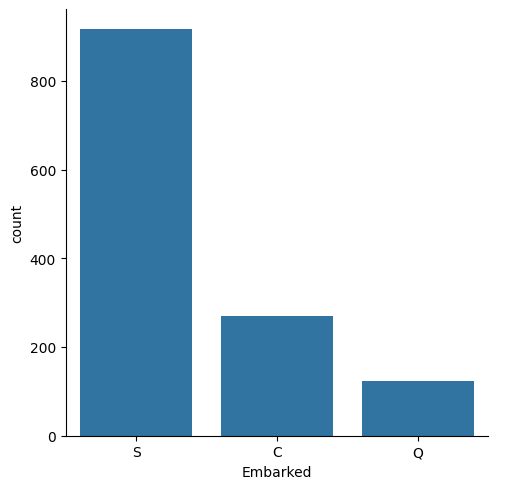

In [8]:
sns.catplot(x = 'Embarked', kind = 'count', data = all) #or all['Embarked'].value_counts()

In [10]:
#Title
import re
def get_title(name):
    title_search = re.search(' ([A-Za-z]+\.)', name)

    if title_search:
        return title_search.group(1)
    return ""

all['Title'] = all['Name'].apply(get_title)
all['Title'].value_counts()

Mr.          757
Miss.        260
Mrs.         197
Master.       61
Rev.           8
Dr.            8
Col.           4
Mlle.          2
Major.         2
Ms.            2
Lady.          1
Sir.           1
Mme.           1
Don.           1
Capt.          1
Countess.      1
Jonkheer.      1
Dona.          1
Name: Title, dtype: int64

In [11]:
all['Title'] = all['Title'].replace(['Capt.', 'Dr.', 'Major.', 'Rev.'], 'Officer.')
all['Title'] = all['Title'].replace(['Lady.', 'Countess.', 'Don.', 'Sir.', 'Jonkheer.', 'Dona.'], 'Royal.')
all['Title'] = all['Title'].replace(['Mlle.', 'Ms.'], 'Miss.')
all['Title'] = all['Title'].replace(['Mme.'], 'Mrs.')
all['Title'].value_counts()

Mr.         757
Miss.       264
Mrs.        198
Master.      61
Officer.     19
Royal.        6
Col.          4
Name: Title, dtype: int64

In [12]:
#Cabin
all['Cabin'] = all['Cabin'].fillna('Missing')
all['Cabin'] = all['Cabin'].str[0]
all['Cabin'].value_counts()

M    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin, dtype: int64

In [15]:
#Family Size & Alone
all['Family_Size'] = all['SibSp'] + all['Parch'] + 1
all['IsAlone'] = 0
all.loc[all['Family_Size']==1, 'IsAlone'] = 1
all.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_Size,IsAlone
0,0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,Mr.,2,0
1,1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs.,2,0
2,2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,Miss.,1,1
3,3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs.,2,0
4,4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,Mr.,1,1


In [20]:
all_dummies = pd.get_dummies(all, drop_first = True)
all_dummies.head()

,index,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size,IsAlone,...,Cabin_M,Cabin_T,Embarked_Q,Embarked_S,Title_Master.,Title_Miss.,Title_Mr.,Title_Mrs.,Title_Officer.,Title_Royal.
0,0,1,0.0,3,22.0,1,0,7.2500,2,0,...,1,0,0,1,0,0,1,0,0,0
1,1,2,1.0,1,38.0,1,0,71.2833,2,0,...,0,0,0,0,0,0,0,1,0,0
2,2,3,1.0,3,26.0,0,0,7.9250,1,1,...,1,0,0,1,0,1,0,0,0,0
3,3,4,1.0,1,35.0,1,0,53.1000,2,0,...,0,0,0,1,0,0,0,1,0,0
4,4,5,0.0,3,35.0,0,0,8.0500,1,1,...,1,0,0,1,0,0,1,0,0,0


In [21]:
all_train = all_dummies[all_dummies['Survived'].notna()]
all_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Columns: 2261 entries, index to Title_Royal.
dtypes: float64(3), int64(7), uint8(2251)
memory usage: 2.0 MB


In [22]:
all_test = all_dummies[all_dummies['Survived'].isna()]
all_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 891 to 1308
Columns: 2261 entries, index to Title_Royal.
dtypes: float64(3), int64(7), uint8(2251)
memory usage: 954.8 KB


In [23]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(all_train.drop(['PassengerId','Survived'],axis=1),
all_train['Survived'], test_size=0.30,
random_state=101, stratify = all_train['Survived'])

In [24]:
ada = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=100, random_state=0)
ada.fit(X_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=100,
                   random_state=0)

In [25]:
predictions = ada.predict(X_test)

In [26]:

from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.82      0.87      0.84       165
         1.0       0.77      0.69      0.73       103

    accuracy                           0.80       268
   macro avg       0.79      0.78      0.79       268
weighted avg       0.80      0.80      0.80       268



In [27]:
print (f'Train Accuracy - : {ada.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {ada.score(X_test,y_test):.3f}')

Train Accuracy - : 1.000
Test Accuracy - : 0.802


In [28]:
TestForPred = all_test.drop(['PassengerId', 'Survived'], axis = 1)
t_pred = ada.predict(TestForPred).astype(int)
PassengerId = all_test['PassengerId']

In [29]:
adaSub = pd.DataFrame({'PassengerId': PassengerId, 'Survived':t_pred })
adaSub.head()

,PassengerId,Survived
891,892,0
892,893,0
893,894,0
894,895,0
895,896,1


In [30]:
adaSub.to_csv("1_Ada_Submission.csv", index = False)